In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatOpenAI()


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [4]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer = checkpointer)

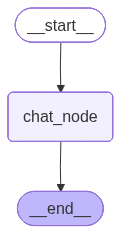

In [5]:
chatbot

In [6]:
# initial_state = {
#     'messages': [HumanMessage(content='What is the capital of india')]
# }

# chatbot.invoke(initial_state)['messages'][-1].content

In [8]:
thread_id = "1"

while True:

    user_message = input("type here: ")
    print("user: ", user_message)

    if user_message.strip().lower() in ["exit", "quit", "bye", "goodbye"]:
        break

    config = {"configurable" : {"thread_id" : thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)

    print("AI: ", response['messages'][-1].content)

user:  hii , My name is Vikas
AI:  Hello Vikas! How can I assist you today?
user:  what is my name?
AI:  Your name is Vikas.
user:  bye


In [9]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hii , My name is Vikas', additional_kwargs={}, response_metadata={}, id='52c51120-fd4c-4a28-ba9b-b6ea67706bb3'), AIMessage(content='Hello Vikas! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 15, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CwjvnUEJEQQe6DBLcKdc7GkYXeuTm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019babe7-3e61-7993-8082-09a4b6ab8df0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 11, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_re